# Lesson 7: Kernel density estimation
In this lab we are going to apply Kernel Density Estimation (KDE) for estimating the probability density function of a random variable.

## what a kernel is in the context of KDE:
**Kernel** is a fuction that satisfies the following criteria:


1.   symmetrical: the kernel function should be symmetric around its mean.
2.   The area under the curve should be 1, ensuring it integrates to 1 over its domain.
3.   Non-negative:the function values should be non-negative.




- Import necessary libraries for numerical computations, plotting, statistical functions, and KDE.
  - **`numpy:`** For numerical operations.
  - **`matplotlib.pyplot`**: For plotting.
  - **`scipy.stats.norm:`** For Gaussian distribution functions.
  - **`sklearn.neighbors.KernelDensity:`** For KDE implementation.



In [ ]:
from sklearn.neighbors import KernelDensity
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from numpy.random import seed
# from numpy.random import poisson
from numpy.random import randn
import pandas as pd
from scipy.stats import kstest
from mpl_toolkits.mplot3d import Axes3D
import itertools
# from matplotlib.mlab import bivariate_normal
from scipy.stats import multivariate_normal
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.10/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['multivariate_normal']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


- Kernel Visualization:

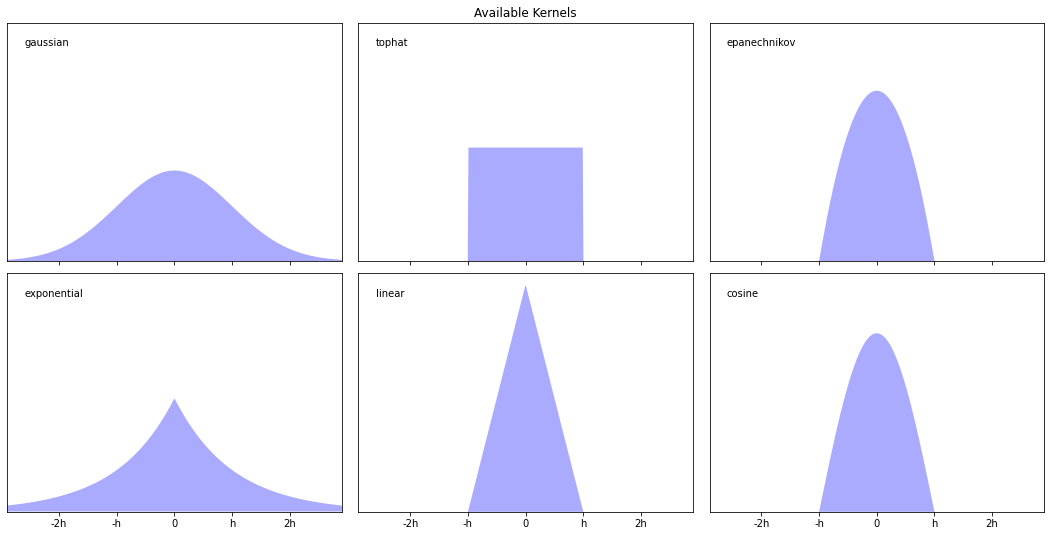

In [ ]:
# Plot all available kernels
X_plot = np.linspace(-6, 6, 1000)[:, None]
X_src = np.zeros((1, 1))

fig, ax = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(16,9))
fig.subplots_adjust(left=0.05, right=0.95, hspace=0.05, wspace=0.05)


def format_func(x, loc):
    if x == 0:
        return "0"
    elif x == 1:
        return "h"
    elif x == -1:
        return "-h"
    else:
        return "%ih" % x


for i, kernel in enumerate(
    ["gaussian", "tophat", "epanechnikov", "exponential", "linear", "cosine"]
):
    axi = ax.ravel()[i]
    log_dens = KernelDensity(kernel=kernel).fit(X_src).score_samples(X_plot)
    axi.fill(X_plot[:, 0], np.exp(log_dens), "-k", fc="#AAAAFF")
    axi.text(-2.6, 0.95, kernel)

    axi.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
    axi.xaxis.set_major_locator(plt.MultipleLocator(1))
    axi.yaxis.set_major_locator(plt.NullLocator())

    axi.set_ylim(0, 1.05)
    axi.set_xlim(-2.9, 2.9)

ax[0, 1].set_title("Available Kernels")
None

Kernels allow you to apply linear simple methods to complex problems:

$$f(x) = \frac{1}{nh}\sum_{i=1}^{n} K(\frac{x-x_i}{h}),$$



  *   K - kernel function
  *   h - bandwidth



- Define a function to generate sample data.


In [ ]:
def generate_data(seed=17):
    rand = np.random.RandomState(seed)
    x = []
    dat = rand.lognormal(0, 0.3, 1000)
    x = np.concatenate((x, dat))
    dat = rand.normal(3, 1, 1000)
    x = np.concatenate((x, dat))
    return x

- Generate and visualize the sample data.

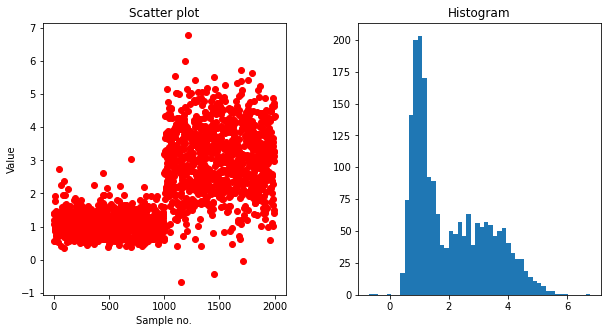

In [ ]:
x_train = generate_data()[:, np.newaxis] #generating data and reshaping it
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
plt.subplot(121)
plt.scatter(np.arange(len(x_train)), x_train, c='red')
plt.xlabel('Sample no.')
plt.ylabel('Value')
plt.title('Scatter plot')
plt.subplot(122)
plt.hist(x_train, bins=50)
plt.title('Histogram')
fig.subplots_adjust(wspace=.3)
plt.show()

- Fit a KDE model to the data and visualize the results.

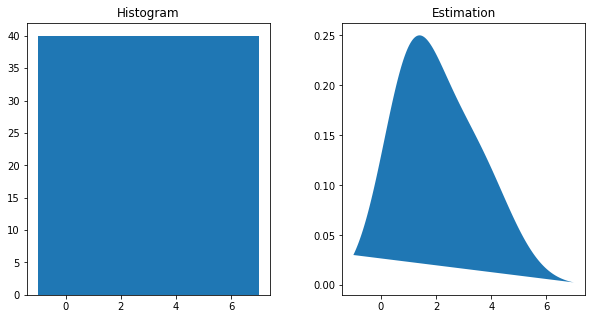

In [ ]:
x_test = np.linspace(-1, 7, 2000)[:, np.newaxis]
model = KernelDensity()
model.fit(x_train)
log_dens = model.score_samples(x_test)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
plt.subplot(121)
plt.hist(x_test, bins=50)
plt.title('Histogram')
plt.subplot(122)
plt.fill(x_test, np.exp(log_dens))
plt.title('Estimation')
fig.subplots_adjust(wspace=.3)
plt.show()

Let's look how KDE works using gaussian kernel. Our estimator will have the following form:

$$f(x) = \frac{1}{nh}\sum_{i=1}^{n} \frac{1}{\sqrt{2\Pi}} e^{-\frac{(x-x_i)^2}{2h^2}}$$

- Define a Gaussian kernel function.

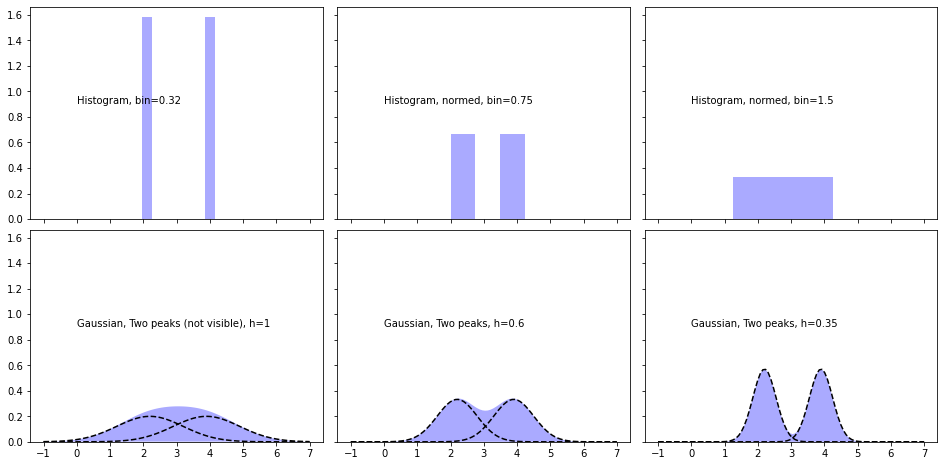

In [ ]:
def gaussian(x, h=1):
    return np.exp(-x**2/(2*h**2))/(h*np.sqrt(2*np.pi))

#Let's take any value
X=np.array([2.2, 3.9])

# Plot all available kernels
X_plot = np.linspace(-1, 7, 100)[:, None]
bins = np.linspace(-1, 5, 20)
bins[1]-bins[0]
fig, ax = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(14,8))
fig.subplots_adjust(left=0.05, right=0.95, hspace=0.05, wspace=0.05)

ax[0, 0].hist(X[:], bins=bins + 0.75, fc='#AAAAFF', density=True)
ax[0, 0].text(0, 0.9, "Histogram, bin=0.32")

bins = np.linspace(-1, 5, 9)
bins[1]-bins[0]
ax[0, 1].hist(X[:], bins=bins + 0.75, fc='#AAAAFF', density=True)
ax[0, 1].text(0, 0.9, "Histogram, normed, bin=0.75")

bins = np.linspace(-1, 5, 5)
bins[1]-bins[0]
ax[0, 2].hist(X[:], bins=bins + 0.75, fc='#AAAAFF', density=True)
ax[0, 2].text(0, 0.9, "Histogram, normed, bin=1.5")

ax[1, 0].fill(X_plot, (gaussian(X_plot-X[0])+gaussian(X_plot-X[1]))/2, '-k', fc='#AAAAFF')
ax[1, 0].text(0, 0.9, "Gaussian, Two peaks (not visible), h=1")
ax[1, 0].plot(X_plot, (gaussian(X_plot-X[0]))/2, 'k--')
ax[1, 0].plot(X_plot, (gaussian(X_plot-X[1]))/2, 'k--')

ax[1, 1].fill(X_plot, (gaussian(X_plot-X[0],0.6)+gaussian(X_plot-X[1],0.6))/2, '-k', fc='#AAAAFF')
ax[1, 1].text(0, 0.9, "Gaussian, Two peaks, h=0.6")
ax[1, 1].plot(X_plot, (gaussian(X_plot-X[0],0.6))/2, 'k--')
ax[1, 1].plot(X_plot, (gaussian(X_plot-X[1],0.6))/2, 'k--')

ax[1, 2].fill(X_plot, (gaussian(X_plot-X[0],0.35)+gaussian(X_plot-X[1],0.35))/2, '-k', fc='#AAAAFF')
ax[1, 2].text(0, 0.9, "Gaussian, Two peaks, h=0.35")
ax[1, 2].plot(X_plot, (gaussian(X_plot-X[0],0.35))/2, 'k--')
ax[1, 2].plot(X_plot, (gaussian(X_plot-X[1],0.35))/2, 'k--')
plt.show()

- Compare the effect of different bandwidths on KDE.

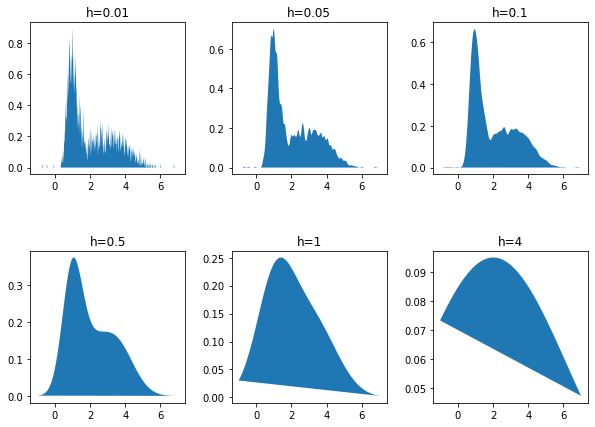

In [ ]:
bandwidths = [0.01, 0.05, 0.1, 0.5, 1, 4]
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(10, 7))
plt_ind = np.arange(6) + 231

for b, ind in zip(bandwidths, plt_ind):
    kde_model = KernelDensity(kernel='gaussian', bandwidth=b)
    kde_model.fit(x_train)
    score = kde_model.score_samples(x_test)
    plt.subplot(ind)
    plt.fill(x_test, np.exp(score))
    plt.title("h="+str(b))

fig.subplots_adjust(hspace=0.5, wspace=.3)
plt.show()

## Exercise 1:
complete the following code to apply Kernel Density Estimation (KDE) to analyze the daily returns of Apple stock data. evaluate its performance, and optimize its parameters.

In [ ]:
stocks = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/finance-charts-apple.csv').loc[:,['Date','AAPL.Open',
                                                                                                                 'AAPL.High','AAPL.Low',
                                                                                                                 'AAPL.Close','AAPL.Volume']]
stocks['Date'] = # your code here
stocks.set_index(stocks['Date'], inplace=True)
stocks

,Date,AAPL.Open,AAPL.High,AAPL.Low,AAPL.Close,AAPL.Volume
Date,,,,,,
2015-02-17,2015-02-17,127.489998,128.880005,126.919998,127.830002,63152400
2015-02-18,2015-02-18,127.629997,128.779999,127.449997,128.720001,44891700
2015-02-19,2015-02-19,128.479996,129.029999,128.330002,128.449997,37362400
2015-02-20,2015-02-20,128.619995,129.500000,128.050003,129.500000,48948400
2015-02-23,2015-02-23,130.020004,133.000000,129.660004,133.000000,70974100
...,...,...,...,...,...,...
2017-02-10,2017-02-10,132.460007,132.940002,132.050003,132.119995,20065500
2017-02-13,2017-02-13,133.080002,133.820007,132.750000,133.289993,23035400
2017-02-14,2017-02-14,133.470001,135.089996,133.250000,135.020004,32815500


In [ ]:
assert not stocks.empty, "Stock data should not be empty"
assert 'Date' in stocks.index.names, "Date should be set as index"

In [ ]:
stocks['pct_change'] =............  # your code is here . calculating the daily returns...........
stocks.dropna(inplace=True)
stocks

,Date,AAPL.Open,AAPL.High,AAPL.Low,AAPL.Close,AAPL.Volume,pct_change
Date,,,,,,,
2015-02-18,2015-02-18,127.629997,128.779999,127.449997,128.720001,44891700,0.006962
2015-02-19,2015-02-19,128.479996,129.029999,128.330002,128.449997,37362400,-0.002098
2015-02-20,2015-02-20,128.619995,129.500000,128.050003,129.500000,48948400,0.008174
2015-02-23,2015-02-23,130.020004,133.000000,129.660004,133.000000,70974100,0.027027
2015-02-24,2015-02-24,132.940002,133.600006,131.169998,132.169998,69228100,-0.006241
...,...,...,...,...,...,...,...
2017-02-10,2017-02-10,132.460007,132.940002,132.050003,132.119995,20065500,-0.002266
2017-02-13,2017-02-13,133.080002,133.820007,132.750000,133.289993,23035400,0.008856
2017-02-14,2017-02-14,133.470001,135.089996,133.250000,135.020004,32815500,0.012979


In [ ]:
assert 'pct_change' in stocks.columns, "pct_change column should be present after calculation"

In [ ]:
stocks.index.min(), stocks.index.max()

(Timestamp('2015-02-18 00:00:00'), Timestamp('2017-02-16 00:00:00'))

In [ ]:
train = stocks['2015':'2016']

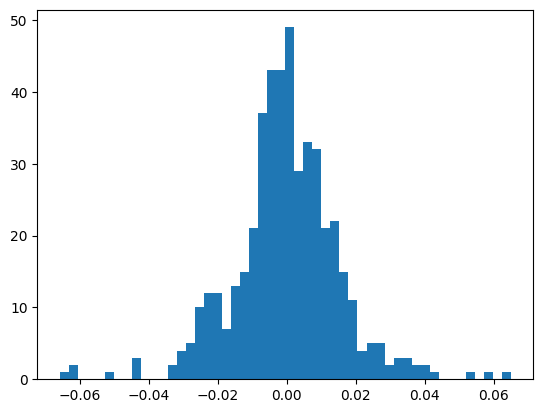

In [ ]:
train_returns = train['pct_change']
plt.hist(train_returns, bins=50);

In [ ]:
assert not train_returns.empty, "Training returns should not be empty"

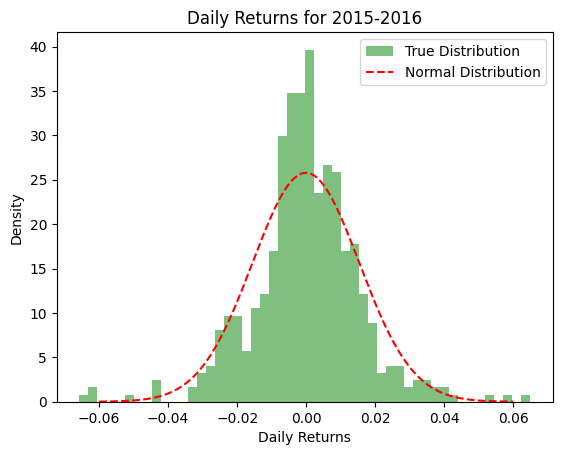

In [ ]:
def normal_pdf(x, mu, sigma):
    return np.exp(-(x - mu)**2 / (2 * sigma ** 2)) / (sigma * np.sqrt(2 * np.pi))

mu, sigma = train_returns.mean(), train_returns.std()
xs = np.linspace(-0.06, 0.06, 1000)

plt.hist(
    ## your code is here : draw the original histogram
         )

plt.plot(
    # your code is here :draw PDF
    )

plt.title('Daily Returns for 2015-2016')
plt.ylabel('Density')
plt.xlabel('Daily Returns')
plt.legend(loc='best')
None

In [ ]:
assert mu != 0, "Mean should not be zero"
assert sigma != 0, "Standard deviation should not be zero"

The train data is not normal!

In [ ]:
# Normality test function
def normality_test(x, alpha=0.05):
    # to-do: return the p-value of normality test


    return p_value  # Return the p-value

# Perform normality test and store the result
p_value = normality_test(train_returns, alpha=0.01)  # Assign the returned value to p_value


p-value is equal to 1.965221057661904e-08, the data is not normal


In [ ]:
assert p_value < 1, "p-value should be a valid probability"


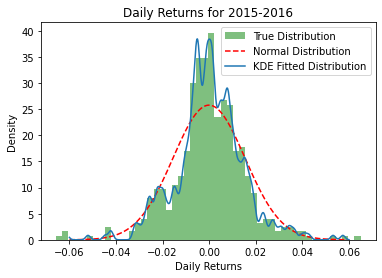

In [ ]:
train_returns_arr = np.array(train_returns).reshape(-1, 1)
kde = # your code is here: fit KDE model with 0.001 bandwidth


mu, sigma = train_returns.mean(), train_returns.std()

log_probs = kde.score_samples(xs.reshape(-1, 1))
kde_pdf = np.exp(log_probs)

plt.hist(train_returns, density=True, color='green', bins=50, alpha=0.5, histtype='stepfilled', label='True Distribution')
plt.plot(xs, normal_pdf(xs, mu, sigma), color='red', linestyle='--', label='Normal Distribution')
plt.plot(xs, kde_pdf, label='KDE Fitted Distribution')
plt.title('Daily Returns for 2015-2016')
plt.ylabel('Density')
plt.xlabel('Daily Returns')
plt.legend(loc='best')
None

In [ ]:
assert kde is not None, "KDE model should be successfully fitted"
assert kde_pdf is not None, "KDE PDF should be calculated"

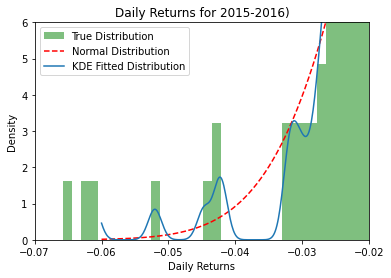

In [ ]:
plt.hist(train_returns, density=True, color='green', bins=100, alpha=0.5, histtype='stepfilled', label='True Distribution')
plt.plot(xs, normal_pdf(xs, mu, sigma), color='red', linestyle='--', label='Normal Distribution')
plt.plot(xs, kde_pdf, label='KDE Fitted Distribution')
plt.title('Daily Returns for 2015-2016)')
plt.ylabel('Density')
plt.xlabel('Daily Returns')
plt.xlim([-0.07, -0.02])
plt.ylim([0, 6])
plt.legend(loc='upper left');

The fitted distribution is not precise. Let's optimize parameters!

In [ ]:
from sklearn.model_selection import GridSearchCV

params = # your code is here : define parameters for a grid search
grid = # your code is here : run a gread search for 20 cross validation folds

grid.best_params_

{'bandwidth': 0.004122448979591837}

In [ ]:
assert best_bandwidth is not None, "Best bandwidth should be found"

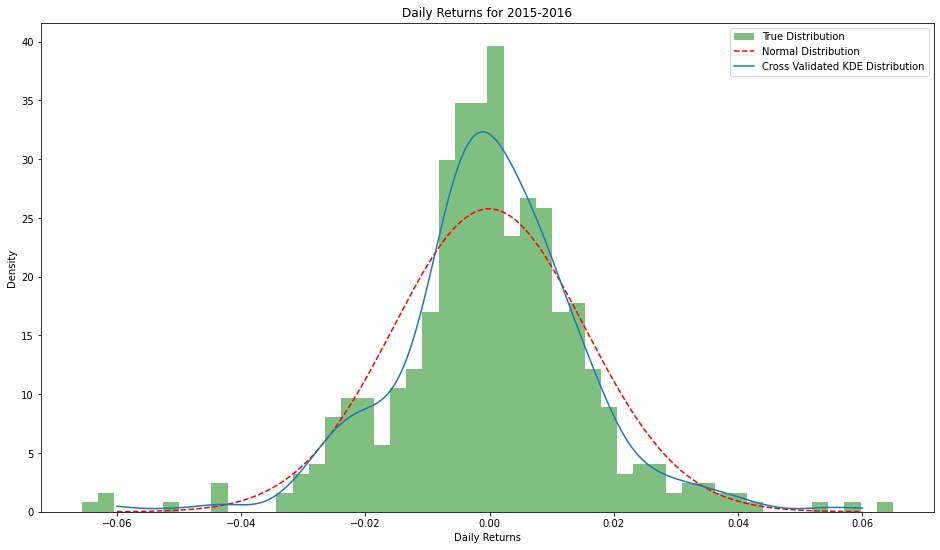

In [ ]:
best_kde = # your code is here : train the best KDE model

log_probs = best_kde.score_samples(xs.reshape(-1,1))
best_kde_pdf = np.exp(log_probs)



plt.subplots(figsize=(16,9))
plt.hist(train_returns, density=True, color='green',
         bins=50, alpha=0.5, histtype='stepfilled', label='True Distribution')
plt.plot(xs, normal_pdf(xs, mu, sigma), color='red',
         linestyle='--', label='Normal Distribution')
plt.plot(xs, best_kde_pdf, label='Cross Validated KDE Distribution')
plt.title('Daily Returns for 2015-2016')
plt.ylabel('Density')
plt.xlabel('Daily Returns')
plt.legend(loc='best');

In [ ]:
assert best_kde is not None, "Best KDE model should be successfully trained"
assert best_kde_pdf is not None, "Optimized KDE PDF should be calculated"

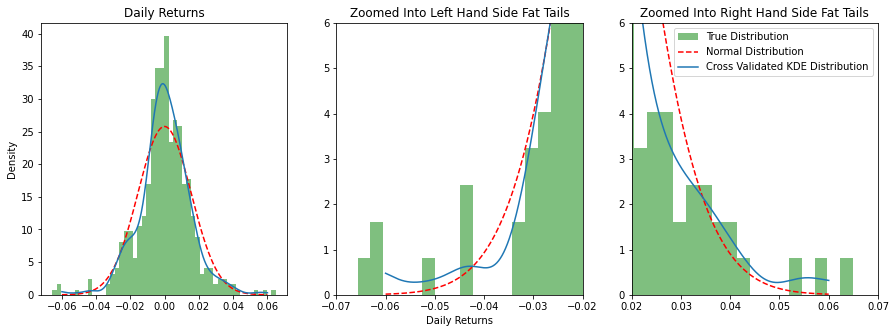

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
for i in range(3):
    ax[i].hist(train_returns, density=True, color='green', bins=50, alpha=0.5,
               histtype='stepfilled', label='True Distribution')
    ax[i].plot(xs, normal_pdf(xs, mu, sigma), color='red',
         linestyle='--', label='Normal Distribution')
    ax[i].plot(xs, best_kde_pdf, label='Cross Validated KDE Distribution')

ax[0].set_ylabel('Density')
ax[1].set_xlabel('Daily Returns')
ax[0].set_title('Daily Returns')
ax[1].set_title('Zoomed Into Left Hand Side Fat Tails')
ax[2].set_title('Zoomed Into Right Hand Side Fat Tails')

ax[1].set_xlim([-0.07, -0.02])
ax[1].set_ylim([0, 6])
ax[2].set_xlim([0.02, 0.07])
ax[2].set_ylim([0, 6])

ax[2].legend();



## Useful Sources



*   [Beautiful vizualizations of CDF](https://plotly.com/python/ecdf-plots/)
*   [Several implementation of KDE](https://jakevdp.github.io/blog/2013/12/01/kernel-density-estimation/)
*   [How does KDE work?](https://medium.com/analytics-vidhya/kernel-density-estimation-kernel-construction-and-bandwidth-optimization-using-maximum-b1dfce127073)
*   [KDE plots](https://github.com/StephanieStallworth/Exploratory_Data_Analysis_Visualization_Python/blob/master/Python%20A-Z%20Movie%20Rating%20Data%20Visualization.ipynb)
*   [3D KDE](https://nbviewer.org/github/rasbt/pattern_classification/blob/master/parameter_estimation_techniques/parzen_window_technique.ipynb)
*   [KDE tutorial](https://www.homeworkhelponline.net/blog/math/tutorial-kde)
*   [KDE video](https://www.youtube.com/watch?app=desktop&v=x5zLaWT5KPs&feature=youtu.be)

## Bonus task

Rewrite and explain implementation for 2D KDE from [KDE tutorial](https://nbviewer.org/github/rasbt/pattern_classification/blob/master/parameter_estimation_techniques/parzen_window_technique.ipynb).